In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [2]:
data = pd.read_csv("LCV.csv")

Features and Target variables

In [3]:
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# HV and LCV
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W']].values

target = data['SD'].values

Normalize data

In [4]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [6]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [7]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)



Epoch 1/800

3/3 [==============================] - 4s 284ms/step - loss: 553.3598 - val_loss: 676.0764
Epoch 2/800
3/3 [==============================] - 0s 24ms/step - loss: 552.4689 - val_loss: 675.1915
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 551.7441 - val_loss: 674.3860
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 550.9932 - val_loss: 673.4741
Epoch 5/800
3/3 [==============================] - 0s 22ms/step - loss: 550.1726 - val_loss: 672.3985
Epoch 6/800
3/3 [==============================] - 0s 23ms/step - loss: 549.1401 - val_loss: 671.0999
Epoch 7/800
3/3 [==============================] - 0s 23ms/step - loss: 548.0044 - val_loss: 669.4795
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 546.4221 - val_loss: 667.4068
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 544.5271 - val_loss: 664.6362
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 541.8

Visualize LSTM results

0.7475556837527053


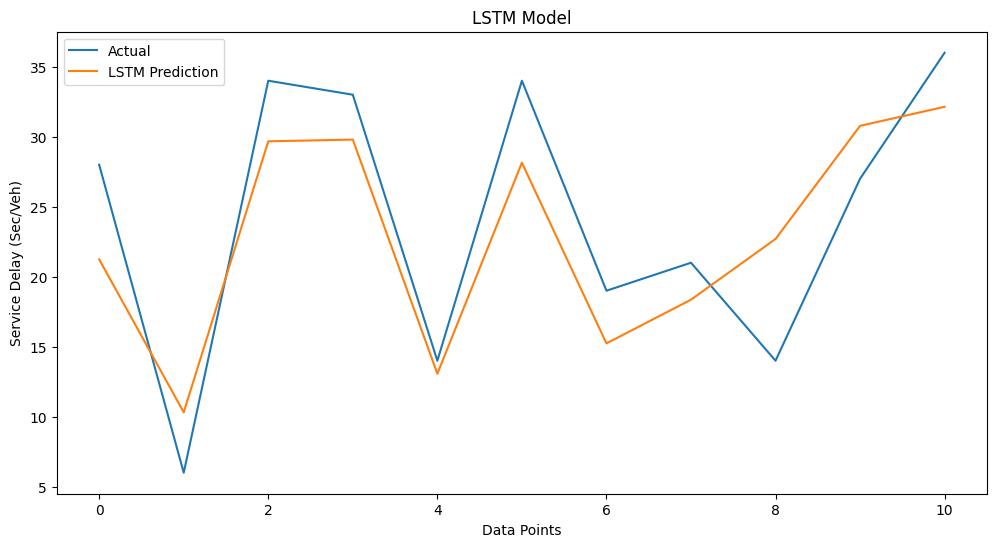

In [8]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [9]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
3/3 [==============================] - 7s 368ms/step - loss: 552.0164 - val_loss: 673.5923
Epoch 2/800
3/3 [==============================] - 0s 16ms/step - loss: 549.9241 - val_loss: 670.9846
Epoch 3/800
3/3 [==============================] - 0s 24ms/step - loss: 547.4401 - val_loss: 667.6666
Epoch 4/800
3/3 [==============================] - 0s 24ms/step - loss: 544.4263 - val_loss: 663.2807
Epoch 5/800
3/3 [==============================] - 0s 25ms/step - loss: 540.1605 - val_loss: 657.3769
Epoch 6/800
3/3 [==============================] - 0s 25ms/step - loss: 534.7390 - val_loss: 649.1221
Epoch 7/800
3/3 [==============================] - 0s 25ms/step - loss: 526.5255 - val_loss: 637.0986
Epoch 8/800
3/3 [==============================] - 0s 25ms/step - loss: 514.4358 - val_loss: 619.1403
Epoch 9/800
3/3 [==============================] - 0s 25ms/step - loss: 497.2348 - val_loss: 591.0017
Epoch 10/800
3/3 [==============================] - 0s 25ms/step - loss: 470.9782

Visualize BiLSTM results

0.7814734721511425


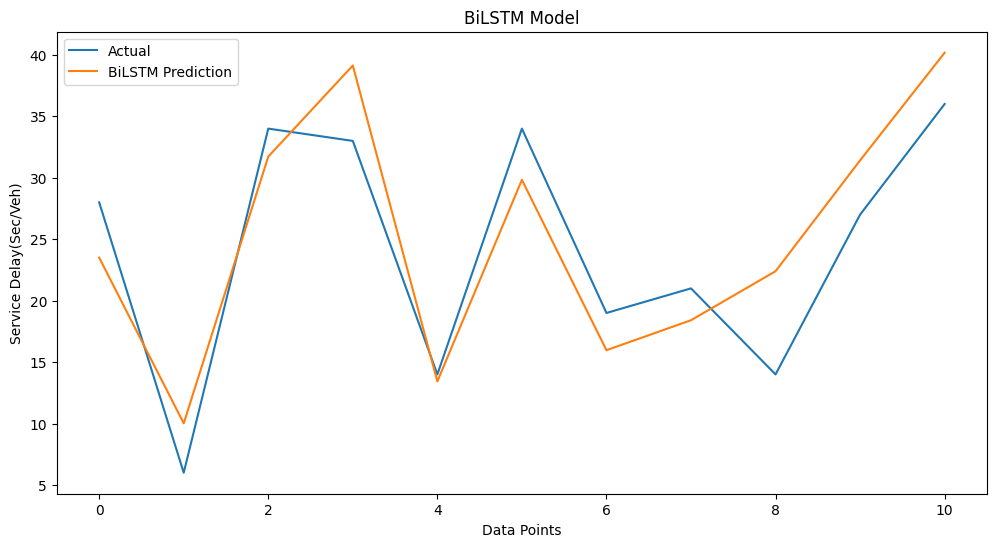

In [10]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [11]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
3/3 [==============================] - 3s 233ms/step - loss: 553.1939 - val_loss: 674.6953
Epoch 2/800
3/3 [==============================] - 0s 17ms/step - loss: 550.8887 - val_loss: 672.1148
Epoch 3/800
3/3 [==============================] - 0s 24ms/step - loss: 548.5543 - val_loss: 669.3026
Epoch 4/800
3/3 [==============================] - 0s 17ms/step - loss: 546.0900 - val_loss: 666.1799
Epoch 5/800
3/3 [==============================] - 0s 24ms/step - loss: 543.3194 - val_loss: 662.4238
Epoch 6/800
3/3 [==============================] - 0s 17ms/step - loss: 539.7644 - val_loss: 657.6312
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 535.0281 - val_loss: 651.5005
Epoch 8/800
3/3 [==============================] - 0s 17ms/step - loss: 529.3192 - val_loss: 643.3494
Epoch 9/800
3/3 [==============================] - 0s 25ms/step - loss: 521.4584 - val_loss: 632.3318
Epoch 10/800
3/3 [==============================] - 0s 17ms/step - loss: 510.9442

Visualize GRU results

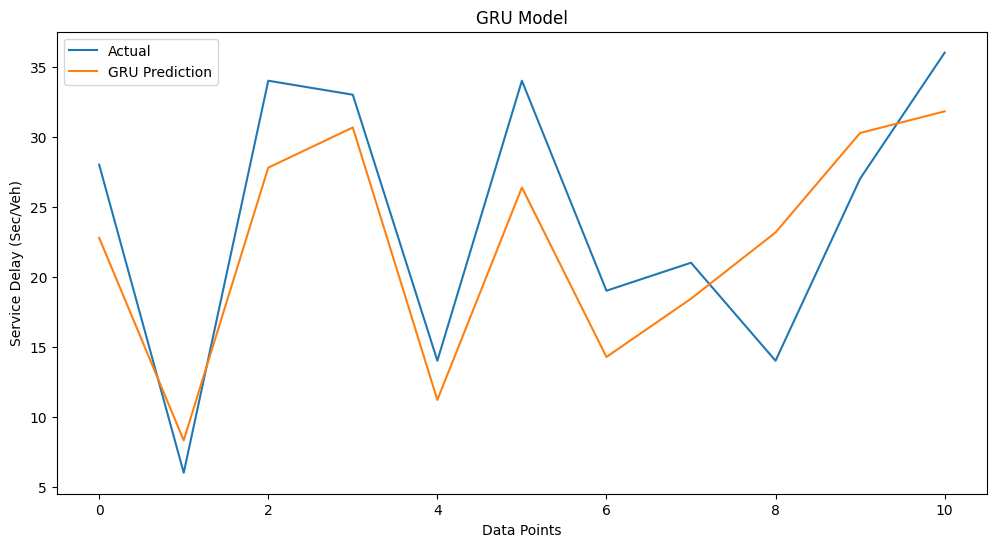

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [13]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=62, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
1/1 [==============================] - 7s 7s/step - loss: 552.9197 - val_loss: 674.4609
Epoch 2/800
1/1 [==============================] - 0s 32ms/step - loss: 551.3582 - val_loss: 672.8530
Epoch 3/800
1/1 [==============================] - 0s 79ms/step - loss: 549.9811 - val_loss: 671.3815
Epoch 4/800
1/1 [==============================] - 0s 63ms/step - loss: 548.7200 - val_loss: 669.9355
Epoch 5/800
1/1 [==============================] - 0s 47ms/step - loss: 547.4802 - val_loss: 668.4810
Epoch 6/800
1/1 [==============================] - 0s 48ms/step - loss: 546.2269 - val_loss: 666.9709
Epoch 7/800
1/1 [==============================] - 0s 38ms/step - loss: 544.9278 - val_loss: 665.3995
Epoch 8/800
1/1 [==============================] - 0s 55ms/step - loss: 543.5696 - val_loss: 663.7380
Epoch 9/800
1/1 [==============================] - 0s 45ms/step - loss: 542.1373 - val_loss: 661.9465
Epoch 10/800
1/1 [==============================] - 0s 31ms/step - loss: 540.5940 - 

Visualize BiGRU results

0.7942148094231417


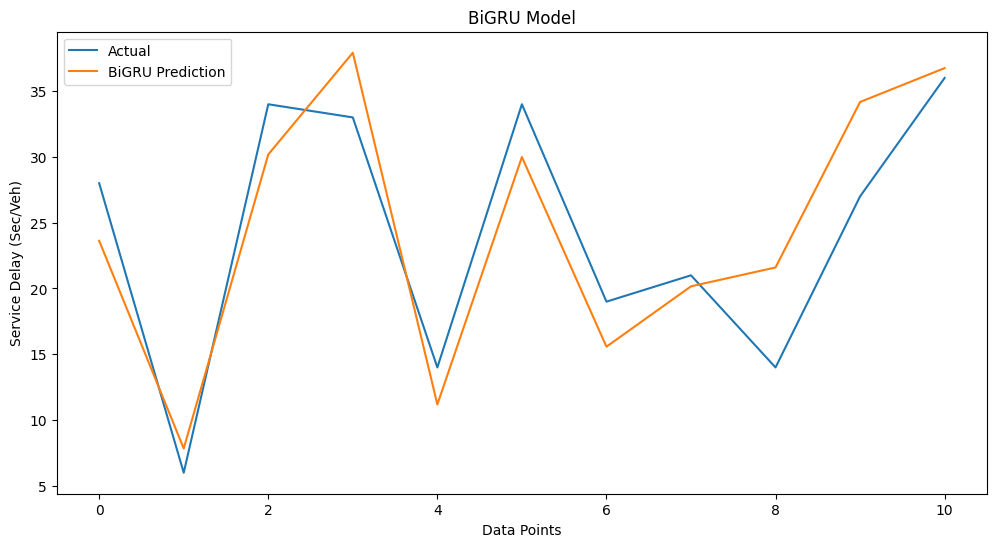

In [14]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [15]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
3/3 [==============================] - 1s 84ms/step - loss: 549.9095 - val_loss: 668.1938
Epoch 2/800
3/3 [==============================] - 0s 16ms/step - loss: 544.2407 - val_loss: 662.2913
Epoch 3/800
3/3 [==============================] - 0s 23ms/step - loss: 539.7042 - val_loss: 656.4658
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 534.4333 - val_loss: 649.8757
Epoch 5/800
3/3 [==============================] - 0s 24ms/step - loss: 528.7208 - val_loss: 642.3307
Epoch 6/800
3/3 [==============================] - 0s 19ms/step - loss: 521.6422 - val_loss: 633.7199
Epoch 7/800
3/3 [==============================] - 0s 15ms/step - loss: 514.2335 - val_loss: 623.8436
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 505.4008 - val_loss: 612.5997
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 495.4388 - val_loss: 599.7774
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 484.1088

Visualize CNN results

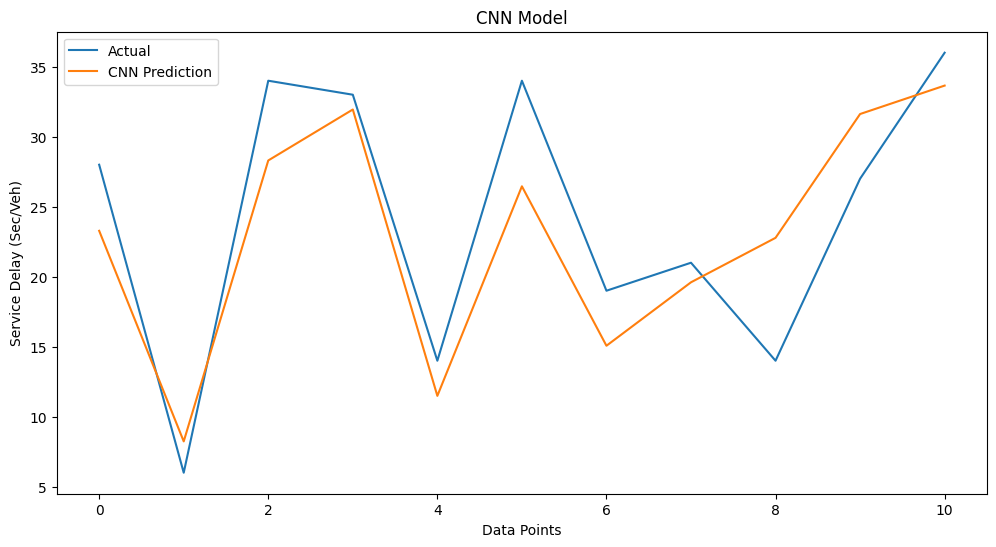

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [17]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
3/3 [==============================] - 2s 181ms/step - loss: 551.7859 - val_loss: 673.5963
Epoch 2/800
3/3 [==============================] - 0s 21ms/step - loss: 550.0135 - val_loss: 671.3931
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 548.0363 - val_loss: 669.0155
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 545.9241 - val_loss: 666.2473
Epoch 5/800
3/3 [==============================] - 0s 27ms/step - loss: 543.5381 - val_loss: 662.8669
Epoch 6/800
3/3 [==============================] - 0s 13ms/step - loss: 540.4163 - val_loss: 658.6902
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 536.6074 - val_loss: 653.4637
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 531.8676 - val_loss: 646.8333
Epoch 9/800
3/3 [==============================] - 0s 23ms/step - loss: 525.9041 - val_loss: 638.3420
Epoch 10/800
3/3 [==============================] - 0s 17ms/step - loss: 518.3485

Visualize CNN_LSTM results

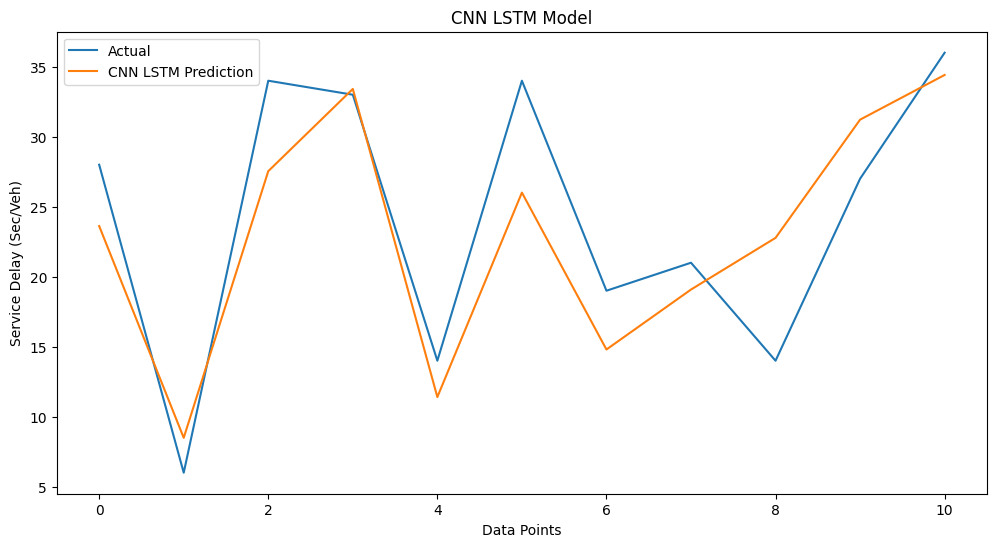

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [19]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
3/3 [==============================] - 2s 149ms/step - loss: 552.7272 - val_loss: 674.0045
Epoch 2/800
3/3 [==============================] - 0s 19ms/step - loss: 550.1821 - val_loss: 671.1038
Epoch 3/800
3/3 [==============================] - 0s 19ms/step - loss: 547.7657 - val_loss: 668.1936
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 545.2949 - val_loss: 664.8779
Epoch 5/800
3/3 [==============================] - 0s 16ms/step - loss: 541.8685 - val_loss: 660.8979
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 538.5016 - val_loss: 655.8406
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 534.0043 - val_loss: 649.2405
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 528.1199 - val_loss: 640.6555
Epoch 9/800
3/3 [==============================] - 0s 8ms/step - loss: 519.6446 - val_loss: 629.4590
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 509.2400 

Visualize CNN_BiLSTM results

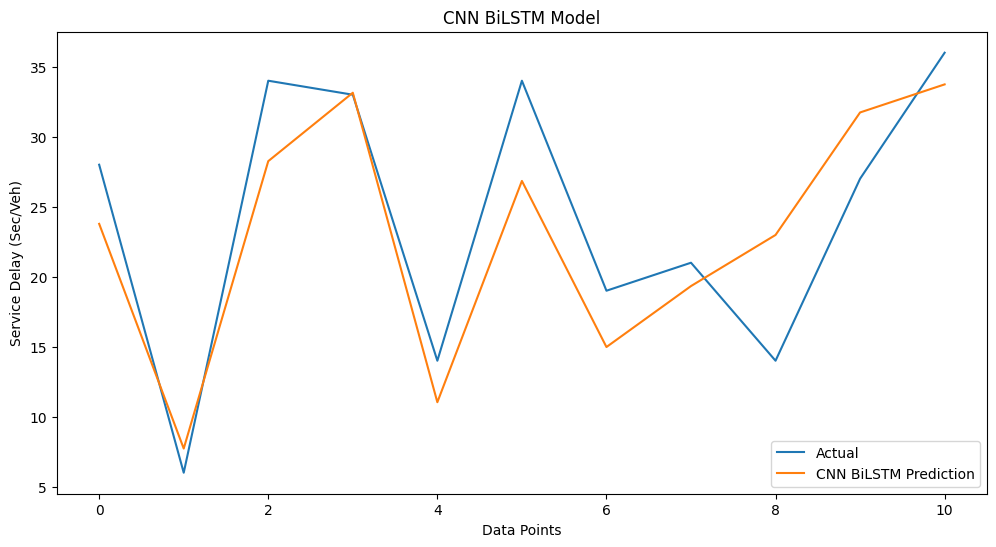

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [21]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

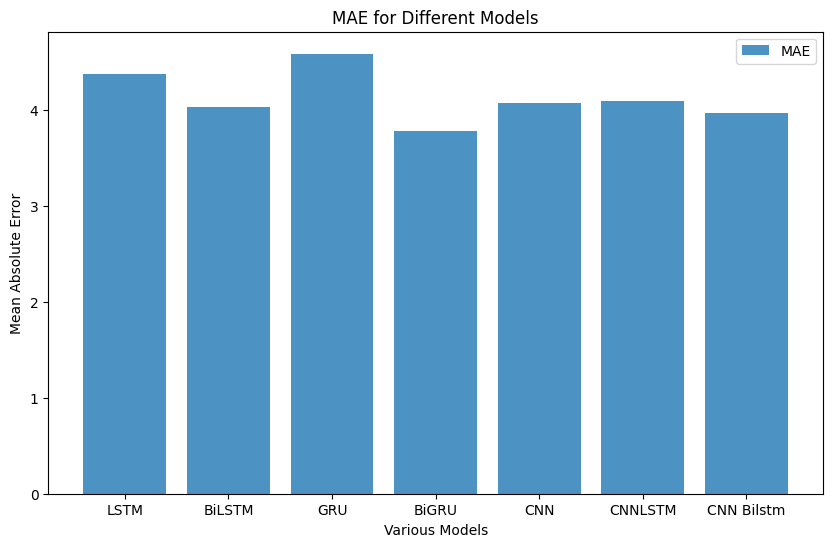

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

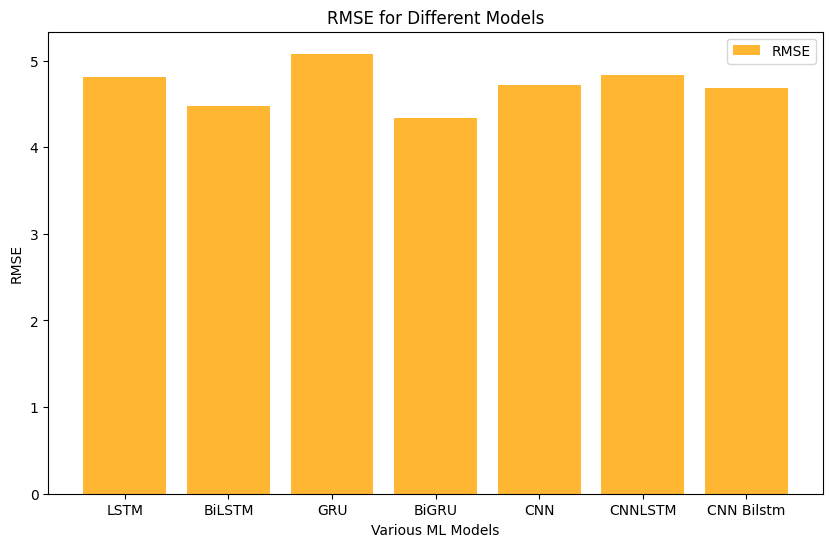

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

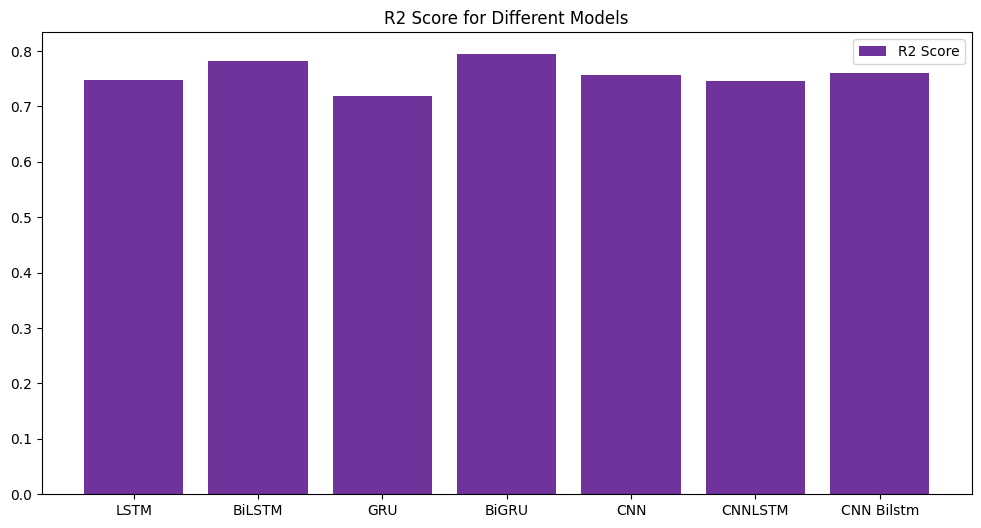

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [25]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.375077594410289
LSTM MSE: 4.8088183470492485
LSTM R2 Score: 0.7475556837527053

BiLSTM MAE: 4.024877028031782
BiLSTM MSE: 4.474120288134898
BiLSTM R2 Score: 0.7814734721511425

GRU MAE: 4.5844548832286485
GRU MSE: 5.079585727209731
GRU R2 Score: 0.7183268557949467

BiGRU MAE: 3.7763970548456367
BiGRU MSE: 4.341728197211562
BiGRU R2 Score: 0.7942148094231417

CNN MAE: 4.076122110540217
CNN MSE: 4.722739468628019
CNN R2 Score: 0.7565124107981811

CNN LSTM MAE: 4.093677694147283
CNN LSTM MSE: 4.829236252974977
CNN LSTM R2 Score: 0.7454074109317229

CNN BiLSTM MAE: 3.966112743724476
CNN BiLSTM MSE: 4.680986949510031
CNN BiLSTM R2 Score: 0.7607986018224946


Plot predictions for each model

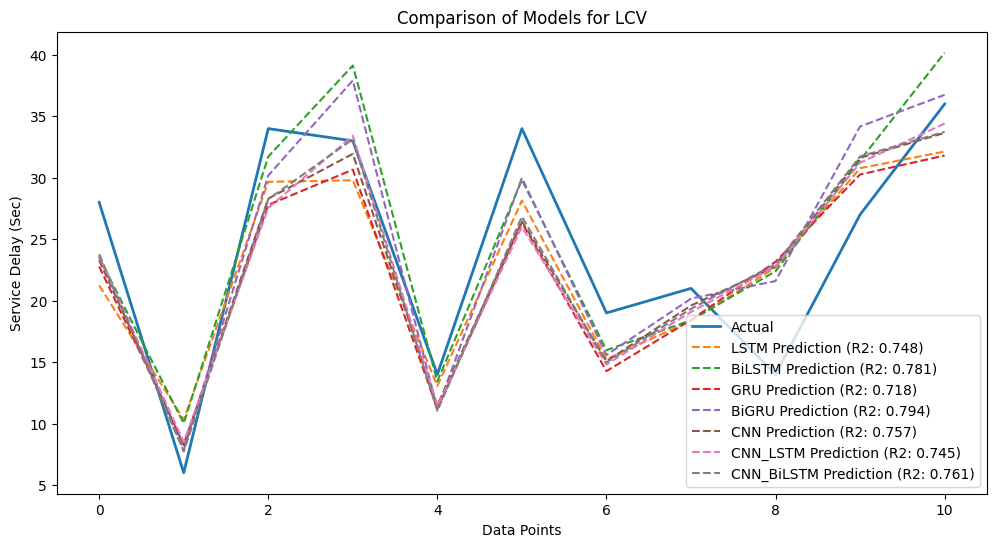

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for LCV')
plt.show()

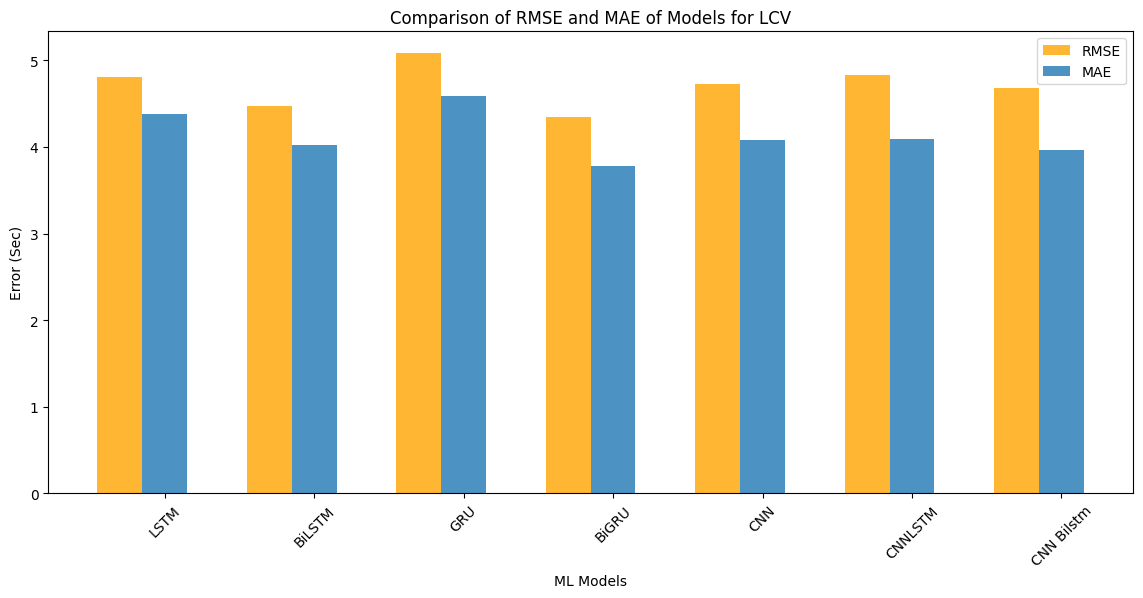

In [28]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for LCV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()